## Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

## Import File

In [6]:
df = pd.read_excel("basics/ALL.xlsx") 
df

,DATE,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM
0,2001-07-01,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55,24.99,26.43,23.40,3.78,3.11,5.05
1,2001-08-01,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64,25.74,27.37,24.56,3.78,2.97,4.73
2,2001-09-01,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65,25.84,26.20,24.24,3.78,2.19,4.63
3,2001-10-01,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78,21.03,22.17,19.93,3.24,2.46,4.65
4,2001-11-01,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32,19.11,19.64,17.50,3.24,2.34,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2023-06-01,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28,74.97,70.25,74.73,10.29,2.18,10.11
264,2023-07-01,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26,80.11,76.07,80.65,9.61,2.55,10.88
265,2023-08-01,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36,85.17,81.39,86.12,10.72,2.58,11.75
266,2023-09-01,19.58,276.00,112.40,1.9,5.33,5.32,5.31,5.08,19644.64,92.67,89.43,93.24,11.43,2.64,13.15


## Linearity Check

In [3]:
selected_columns = ['EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS','INFECTDISEMVTRACK', 'PNICKUSDM']
# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
correlation_matrix

,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
EMVOVERALLEMV,1.000000,0.182091,0.520448,-0.430750,-0.021481,-0.053086,-0.048473,0.371816,-0.089698
EUEPUINDXM,0.182091,1.000000,0.616620,-0.347628,-0.240497,-0.190745,-0.182390,0.406925,-0.100128
USEPUINDXM,0.520448,0.616620,1.000000,-0.421890,-0.406875,-0.391339,-0.394400,0.590064,-0.063905
GACDISA066MSFRBNY,-0.430750,-0.347628,-0.421890,1.000000,0.078487,0.077408,0.072861,-0.216558,0.118928
FEDFUNDS,-0.021481,-0.240497,-0.406875,0.078487,1.000000,0.989973,0.985071,-0.124106,0.419337
TB3MS,-0.053086,-0.190745,-0.391339,0.077408,0.989973,1.000000,0.997234,-0.103188,0.394886
TB6MS,-0.048473,-0.182390,-0.394400,0.072861,0.985071,0.997234,1.000000,-0.106681,0.394018
INFECTDISEMVTRACK,0.371816,0.406925,0.590064,-0.216558,-0.124106,-0.103188,-0.106681,1.000000,0.045874
PNICKUSDM,-0.089698,-0.100128,-0.063905,0.118928,0.419337,0.394886,0.394018,0.045874,1.000000


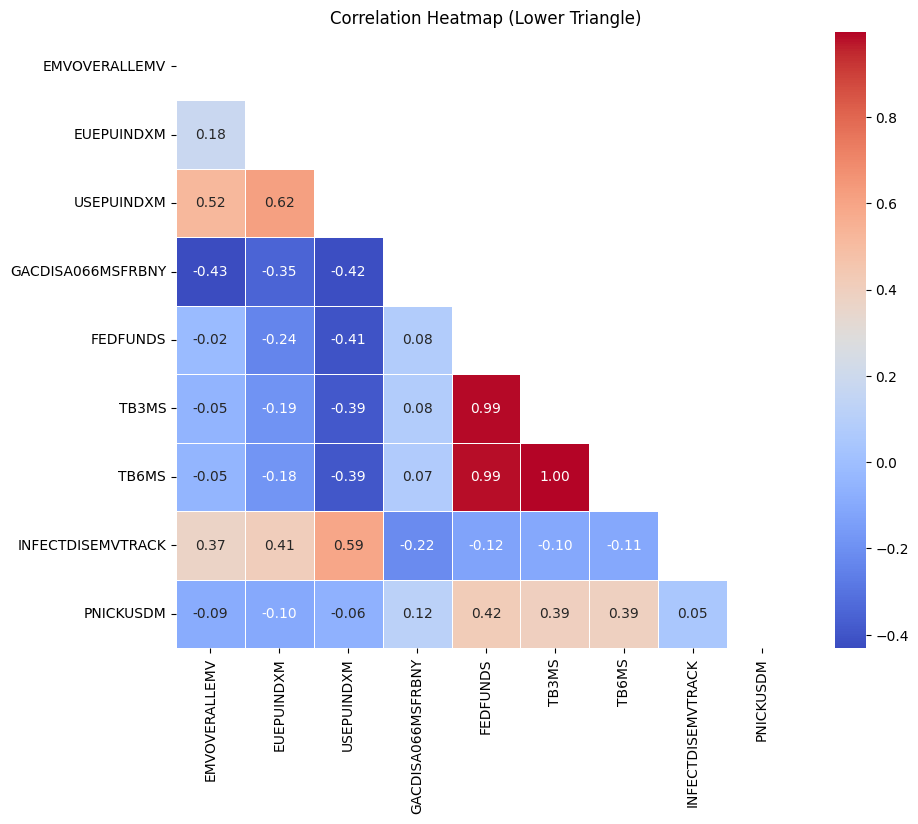

In [4]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [5]:
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_df.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Display the VIF data
vif_data

,Variable,VIF
0,EMVOVERALLEMV,13.484836
1,EUEPUINDXM,11.295207
2,USEPUINDXM,27.134197
3,GACDISA066MSFRBNY,1.320230
4,FEDFUNDS,140.541982
5,TB3MS,603.516358
6,TB6MS,386.632698
7,INFECTDISEMVTRACK,1.623623
8,PNICKUSDM,7.624428


## Removing FEDFUNDS  & TB6MS 	Because of Colinearity issues

In [6]:
selected_columns = ['EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']
# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
correlation_matrix

,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,TB3MS,INFECTDISEMVTRACK,PNICKUSDM
EMVOVERALLEMV,1.000000,0.182091,0.520448,-0.430750,-0.053086,0.371816,-0.089698
EUEPUINDXM,0.182091,1.000000,0.616620,-0.347628,-0.190745,0.406925,-0.100128
USEPUINDXM,0.520448,0.616620,1.000000,-0.421890,-0.391339,0.590064,-0.063905
GACDISA066MSFRBNY,-0.430750,-0.347628,-0.421890,1.000000,0.077408,-0.216558,0.118928
TB3MS,-0.053086,-0.190745,-0.391339,0.077408,1.000000,-0.103188,0.394886
INFECTDISEMVTRACK,0.371816,0.406925,0.590064,-0.216558,-0.103188,1.000000,0.045874
PNICKUSDM,-0.089698,-0.100128,-0.063905,0.118928,0.394886,0.045874,1.000000


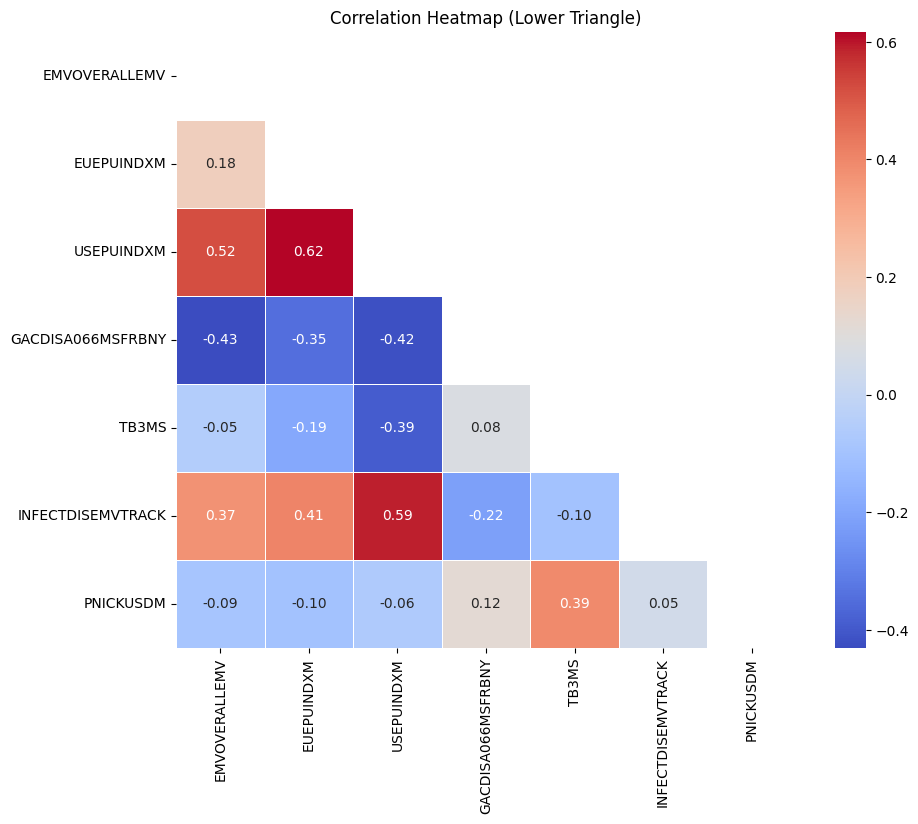

In [7]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [8]:
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_df.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Display the VIF data
vif_data

,Variable,VIF
0,EMVOVERALLEMV,10.467400
1,EUEPUINDXM,10.071816
2,USEPUINDXM,25.582912
3,GACDISA066MSFRBNY,1.317246
4,TB3MS,2.632973
5,INFECTDISEMVTRACK,1.566102
6,PNICKUSDM,6.592669


## Removing EUEPUINDXM  & USEPUINDXM Because of Colinearity issues

In [9]:
selected_columns = ['EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']
# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
correlation_matrix

,EMVOVERALLEMV,GACDISA066MSFRBNY,TB3MS,INFECTDISEMVTRACK,PNICKUSDM
EMVOVERALLEMV,1.000000,-0.430750,-0.053086,0.371816,-0.089698
GACDISA066MSFRBNY,-0.430750,1.000000,0.077408,-0.216558,0.118928
TB3MS,-0.053086,0.077408,1.000000,-0.103188,0.394886
INFECTDISEMVTRACK,0.371816,-0.216558,-0.103188,1.000000,0.045874
PNICKUSDM,-0.089698,0.118928,0.394886,0.045874,1.000000


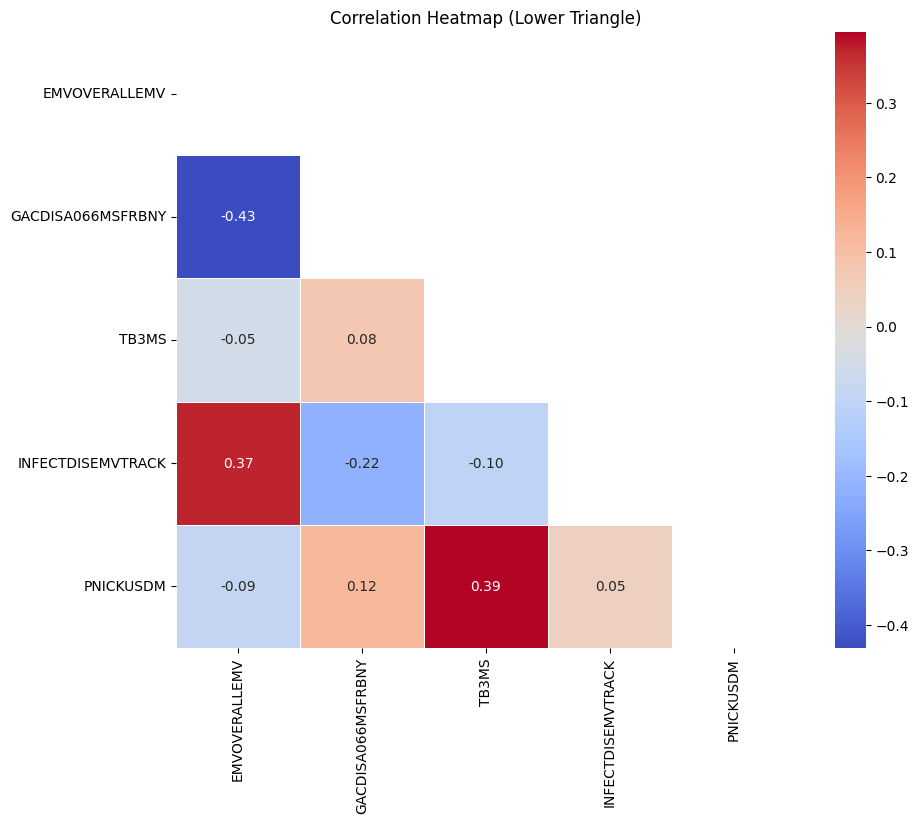

In [10]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [11]:
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_df.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Display the VIF data
vif_data

,Variable,VIF
0,EMVOVERALLEMV,3.809022
1,GACDISA066MSFRBNY,1.314414
2,TB3MS,2.138284
3,INFECTDISEMVTRACK,1.395113
4,PNICKUSDM,5.011718


## Differencing to achive stationarity

In [12]:
selected_columns = ['DATE','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM',
                    "POILBREUSDM", "MCOILWTICO", "POILDUBUSDM", "PNGASEUUSDM", "MHHNGSP","PNGASJPUSDM"]
pruned_df = df[selected_columns]

pruned_df["POILBREUSDM_LAG"] = df["POILBREUSDM"].shift(1)
pruned_df["MCOILWTICO_LAG"] = df["MCOILWTICO"].shift(1)
pruned_df["POILDUBUSDM_LAG"] = df["POILDUBUSDM"].shift(1)
pruned_df["PNGASEUUSDM_LAG"] = df["PNGASEUUSDM"].shift(1)
pruned_df["MHHNGSP_LAG"] = df["MHHNGSP"].shift(1)
pruned_df["PNGASJPUSDM_LAG"] = df["PNGASJPUSDM"].shift(1)

pruned_df.set_index('DATE', inplace=True)
pruned_df.dropna(inplace=True)
pruned_df

C:\Users\FURIOUS\AppData\Local\Temp\ipykernel_30560\2154012545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned_df["POILBREUSDM_LAG"] = df["POILBREUSDM"].shift(1)
C:\Users\FURIOUS\AppData\Local\Temp\ipykernel_30560\2154012545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned_df["MCOILWTICO_LAG"] = df["MCOILWTICO"].shift(1)
C:\Users\FURIOUS\AppData\Local\Temp\ipykernel_30560\2154012545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,EMVOVERALLEMV,GACDISA066MSFRBNY,TB3MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM,POILBREUSDM_LAG,MCOILWTICO_LAG,POILDUBUSDM_LAG,PNGASEUUSDM_LAG,MHHNGSP_LAG,PNGASJPUSDM_LAG
DATE,,,,,,,,,,,,,,,,,
2001-08-01,19.97,-8.0,3.36,0.39,5525.64,25.74,27.37,24.56,3.78,2.97,4.73,24.99,26.43,23.40,3.78,3.11,5.05
2001-09-01,42.43,-12.5,2.64,0.78,5057.65,25.84,26.20,24.24,3.78,2.19,4.63,25.74,27.37,24.56,3.78,2.97,4.73
2001-10-01,29.34,-14.7,2.16,0.72,4830.78,21.03,22.17,19.93,3.24,2.46,4.65,25.84,26.20,24.24,3.78,2.19,4.63
2001-11-01,26.40,-21.5,1.87,0.81,5131.32,19.11,19.64,17.50,3.24,2.34,3.95,21.03,22.17,19.93,3.24,2.46,4.65
2001-12-01,24.36,-9.8,1.69,0.42,5315.82,18.68,19.39,17.84,3.22,2.30,3.68,19.11,19.64,17.50,3.24,2.34,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,18.83,6.6,5.16,6.73,21233.28,74.97,70.25,74.73,10.29,2.18,10.11,75.75,71.58,74.79,9.97,2.15,9.90
2023-07-01,18.11,1.1,5.25,5.92,21091.26,80.11,76.07,80.65,9.61,2.55,10.88,74.97,70.25,74.73,10.29,2.18,10.11
2023-08-01,17.28,-19.0,5.30,5.34,20446.36,85.17,81.39,86.12,10.72,2.58,11.75,80.11,76.07,80.65,9.61,2.55,10.88


In [13]:
level_diff_columns = ['EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS']
log_diff_columns = ['INFECTDISEMVTRACK',"PNICKUSDM","POILBREUSDM", "MCOILWTICO", "POILDUBUSDM", "PNGASEUUSDM", "MHHNGSP","PNGASJPUSDM",
                   "POILBREUSDM_LAG","MCOILWTICO_LAG","POILDUBUSDM_LAG","PNGASEUUSDM_LAG","MHHNGSP_LAG","PNGASJPUSDM_LAG"]

# Perform level differencing
pruned_df[level_diff_columns] = pruned_df[level_diff_columns].diff()

# Perform logarithmic differencing
pruned_df[log_diff_columns] = np.log(pruned_df[log_diff_columns]) - np.log(pruned_df[log_diff_columns].shift(1))

pruned_df.dropna(inplace=True)
pruned_df

,EMVOVERALLEMV,GACDISA066MSFRBNY,TB3MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM,POILBREUSDM_LAG,MCOILWTICO_LAG,POILDUBUSDM_LAG,PNGASEUUSDM_LAG,MHHNGSP_LAG,PNGASJPUSDM_LAG
DATE,,,,,,,,,,,,,,,,,
2001-09-01,22.46,-4.5,-0.72,0.39,-0.088497,0.003877,-0.043688,-0.013115,0.000000,-0.304660,-0.021368,0.029570,0.034948,0.048383,0.000000,-0.046061,-0.065463
2001-10-01,-13.09,-2.2,-0.48,-0.06,-0.045894,-0.205974,-0.167019,-0.195778,-0.154151,0.116260,0.004310,0.003877,-0.043688,-0.013115,0.000000,-0.304660,-0.021368
2001-11-01,-2.94,-6.8,-0.29,0.09,0.060355,-0.095738,-0.121172,-0.130025,0.000000,-0.050010,-0.163152,-0.205974,-0.167019,-0.195778,-0.154151,0.116260,0.004310
2001-12-01,-2.04,11.7,-0.18,-0.39,0.035324,-0.022758,-0.012811,0.019242,-0.006192,-0.017242,-0.070803,-0.095738,-0.121172,-0.130025,0.000000,-0.050010,-0.163152
2002-01-01,4.29,11.2,-0.04,0.29,0.131247,0.069778,0.016876,0.028186,-0.143340,0.008658,-0.030347,-0.022758,-0.012811,0.019242,-0.006192,-0.017242,-0.070803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,-5.14,38.4,0.02,-2.45,-0.041580,-0.010350,-0.018755,-0.000803,0.031592,0.013857,0.020990,-0.097887,-0.104312,-0.109084,-0.316354,-0.004640,-0.193205
2023-07-01,-0.72,-5.5,0.09,-0.81,-0.006711,0.066313,0.079594,0.076237,-0.068368,0.156768,0.073401,-0.010350,-0.018755,-0.000803,0.031592,0.013857,0.020990
2023-08-01,-0.83,-20.1,0.05,-0.58,-0.031054,0.061249,0.067598,0.065623,0.109307,0.011696,0.076927,0.066313,0.079594,0.076237,-0.068368,0.156768,0.073401


## Augmente Dickey Fuller stationarity Test

ADF Test for GACDISA066MSFRBNY:
ADF Statistic: -5.501978562780612
P-value: 2.0615246406628563e-06
Critical Values: {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}


Stationary Time-Series with 95% certainty




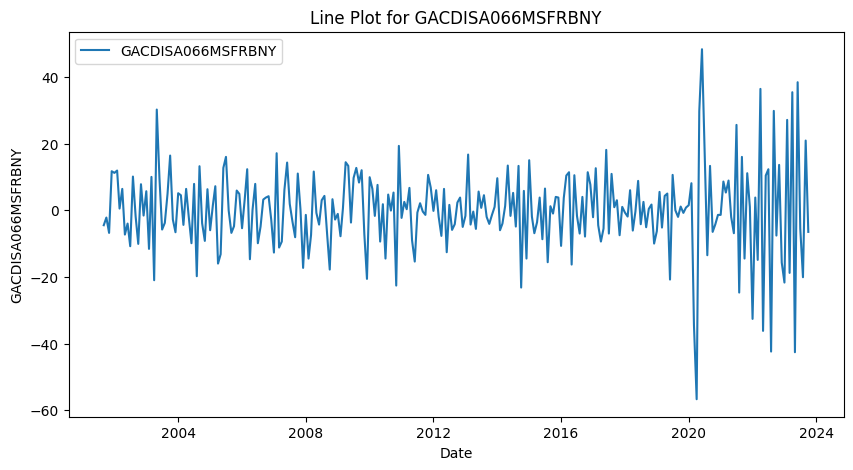

ADF Test for TB3MS:
ADF Statistic: -5.616626685166465
P-value: 1.1703880747719456e-06
Critical Values: {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}


Stationary Time-Series with 95% certainty




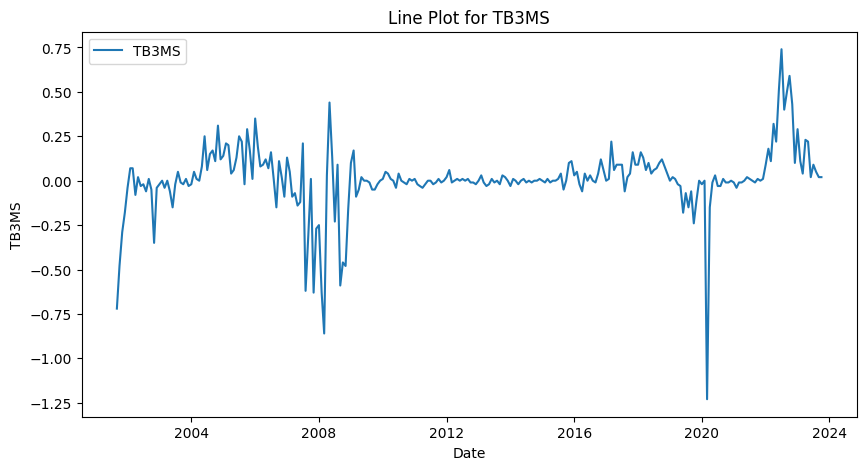

ADF Test for INFECTDISEMVTRACK:
ADF Statistic: -8.900689209298505
P-value: 1.1736201701127474e-14
Critical Values: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


Stationary Time-Series with 95% certainty




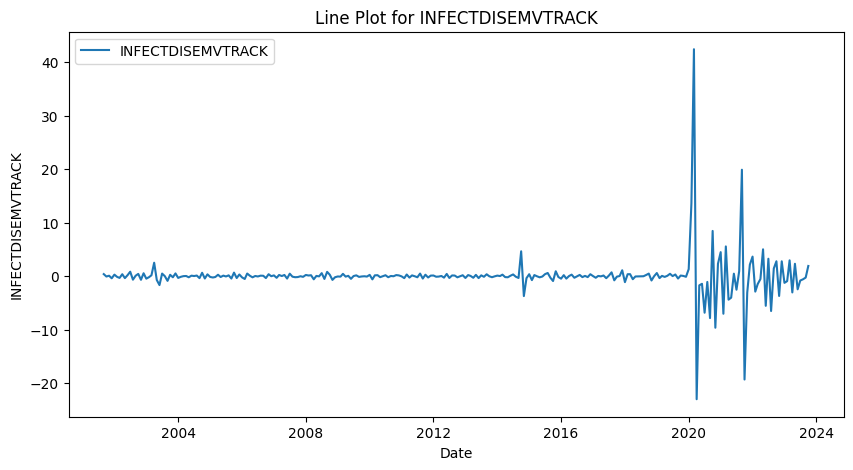

ADF Test for PNICKUSDM:
ADF Statistic: -11.684957686188474
P-value: 1.705858669913873e-21
Critical Values: {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}


Stationary Time-Series with 95% certainty




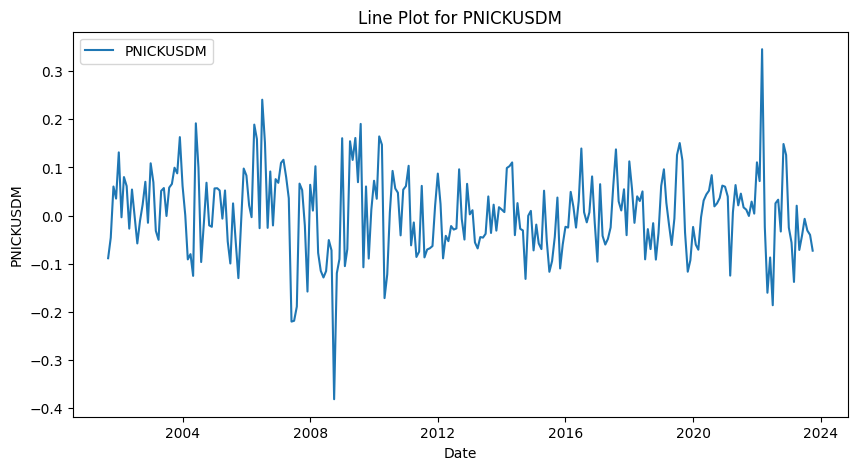

ADF Test for POILBREUSDM:
ADF Statistic: -7.227544213628598
P-value: 2.0344187411863397e-10
Critical Values: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


Stationary Time-Series with 95% certainty




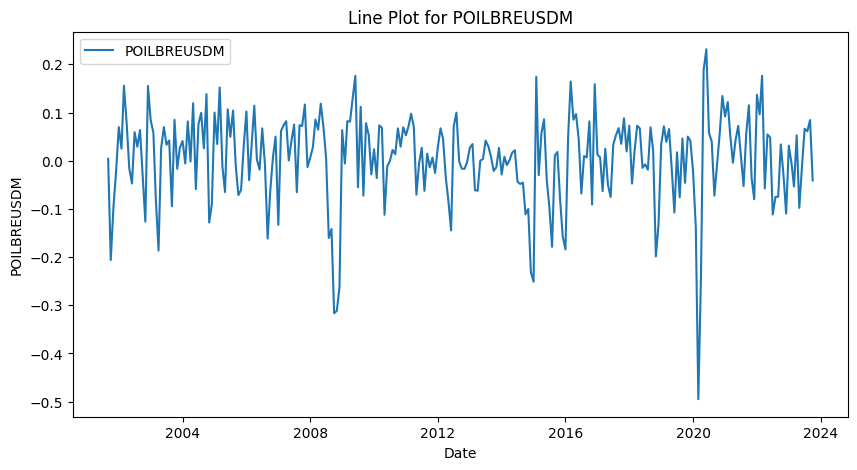

ADF Test for MCOILWTICO:
ADF Statistic: -11.08481961151453
P-value: 4.222625365403927e-20
Critical Values: {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}


Stationary Time-Series with 95% certainty




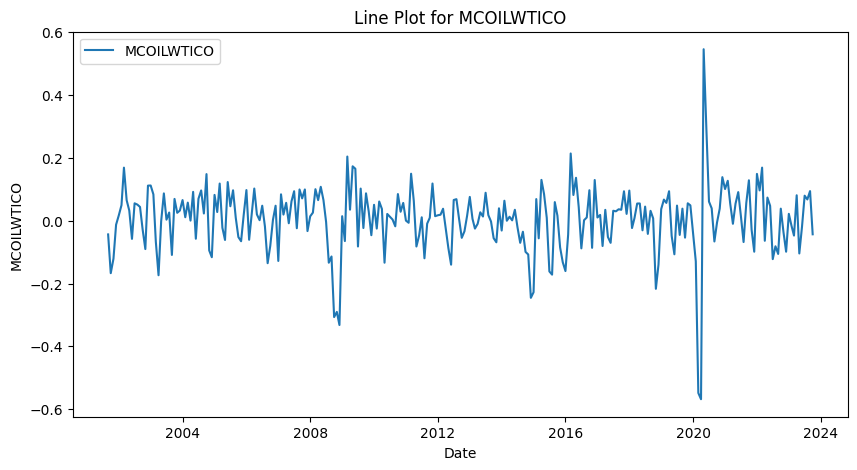

ADF Test for POILDUBUSDM:
ADF Statistic: -9.618891778308656
P-value: 1.7303503018349943e-16
Critical Values: {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}


Stationary Time-Series with 95% certainty




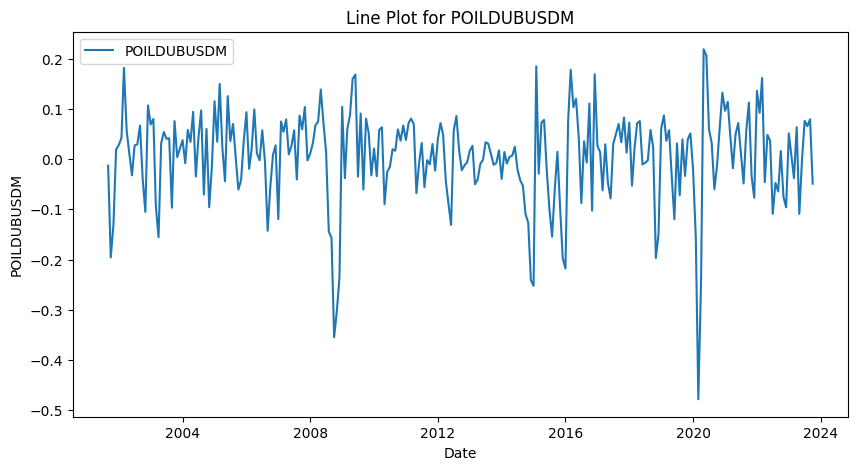

ADF Test for PNGASEUUSDM:
ADF Statistic: -5.501000421713338
P-value: 2.071432314042735e-06
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


Stationary Time-Series with 95% certainty




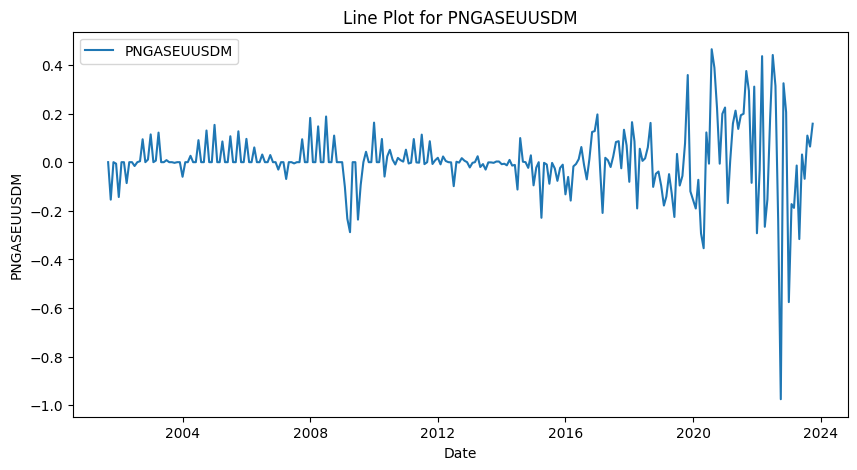

ADF Test for MHHNGSP:
ADF Statistic: -17.282943560530796
P-value: 5.766879095878852e-30
Critical Values: {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}


Stationary Time-Series with 95% certainty




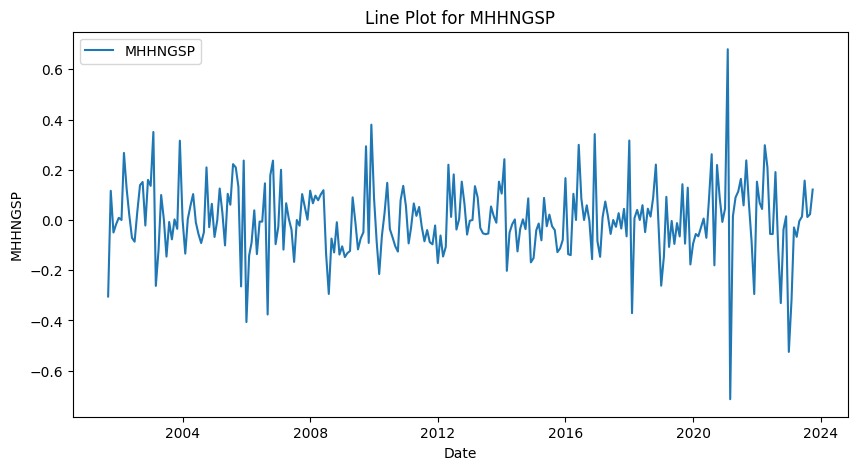

ADF Test for PNGASJPUSDM:
ADF Statistic: -4.447162787907977
P-value: 0.00024469711318926134
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


Stationary Time-Series with 95% certainty




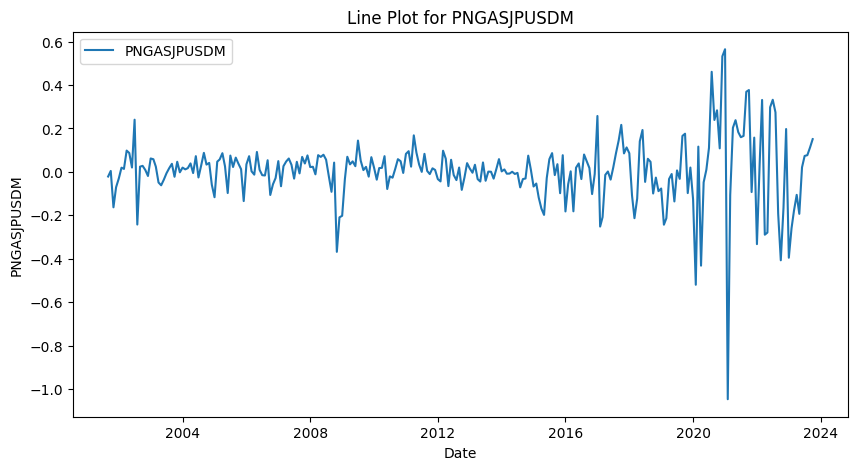

ADF Test for POILBREUSDM_LAG:
ADF Statistic: -7.201395768580234
P-value: 2.3603667534874764e-10
Critical Values: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


Stationary Time-Series with 95% certainty




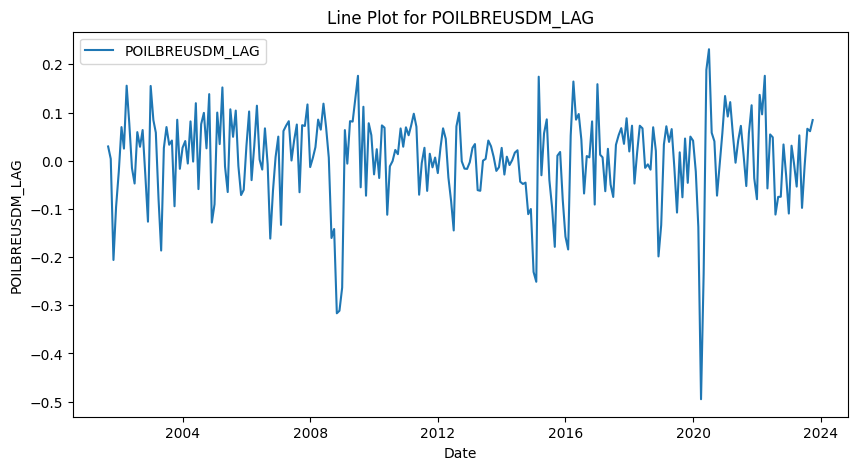

ADF Test for MCOILWTICO_LAG:
ADF Statistic: -10.982044207704293
P-value: 7.416561175391697e-20
Critical Values: {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}


Stationary Time-Series with 95% certainty




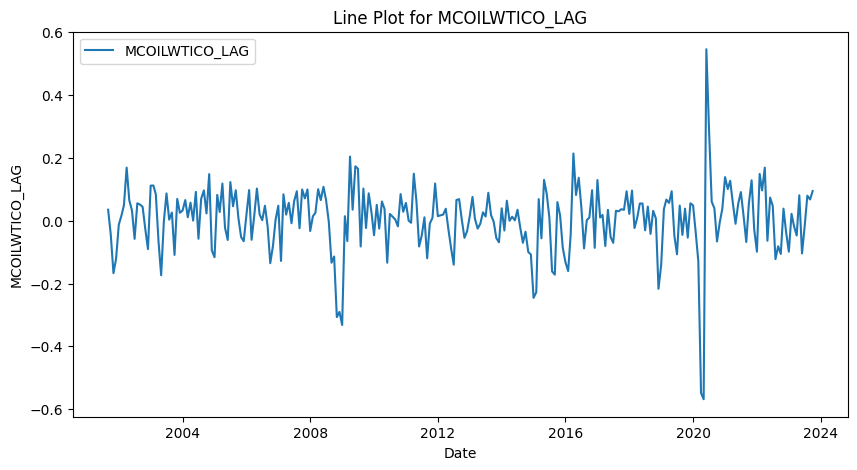

ADF Test for POILDUBUSDM_LAG:
ADF Statistic: -9.522527354079505
P-value: 3.037855445885666e-16
Critical Values: {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}


Stationary Time-Series with 95% certainty




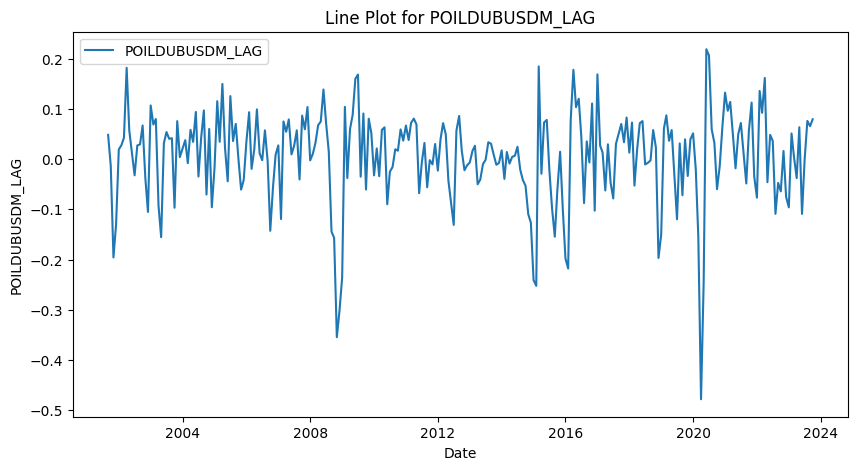

ADF Test for PNGASEUUSDM_LAG:
ADF Statistic: -5.492357095027995
P-value: 2.1610198661509163e-06
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


Stationary Time-Series with 95% certainty




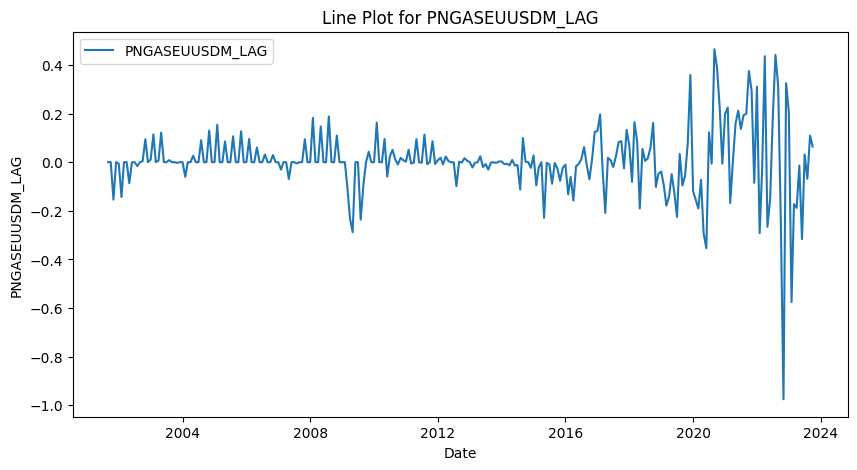

ADF Test for MHHNGSP_LAG:
ADF Statistic: -17.13422722712925
P-value: 7.115740398885914e-30
Critical Values: {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}


Stationary Time-Series with 95% certainty




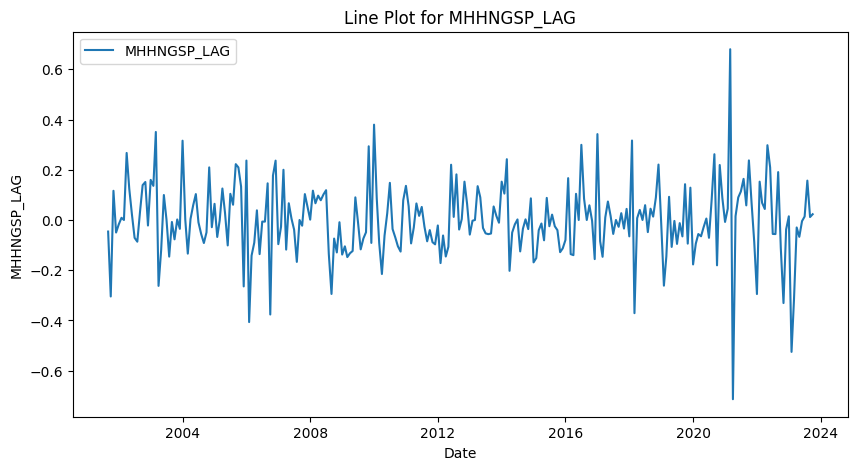

ADF Test for PNGASJPUSDM_LAG:
ADF Statistic: -4.358747410368017
P-value: 0.0003509110791805488
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


Stationary Time-Series with 95% certainty




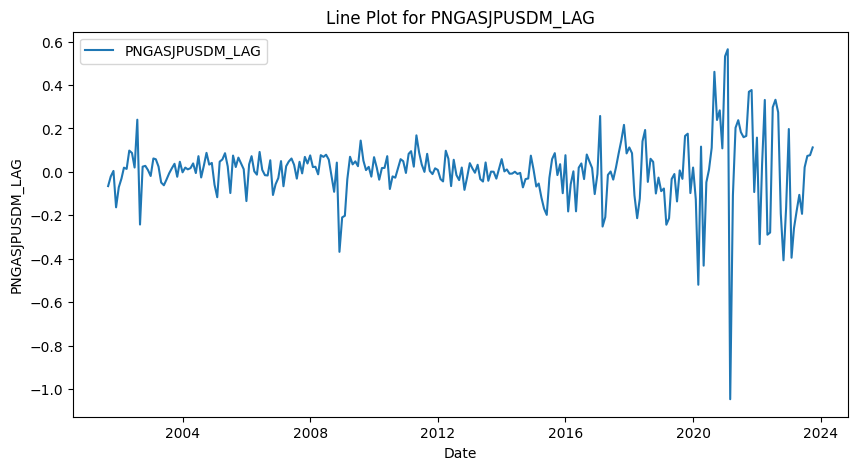

In [14]:
for column in pruned_df.columns[1:]:  # Exclude 'Date' column
    # ADF Test for stationarity
    result = adfuller(pruned_df[column])
    print(f"ADF Test for {column}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print("\n")
    
    if (result[1] <= 0.05):
        print("Stationary Time-Series with 95% certainty")
    else:
        print("Non-stationarity")
    print("\n")

    # Line plot
    plt.figure(figsize=(10, 5))
    plt.plot(pruned_df.index, pruned_df[column], label=column)
    plt.title(f"Line Plot for {column}")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.show()

## Kwiatkowski-Phillips-Schmidt-Shin test for stationarity

In [15]:
result = kpss(pruned_df['EMVOVERALLEMV'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.04526676246587102,
 0.1,
 24,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [16]:
result = kpss(pruned_df['GACDISA066MSFRBNY'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [17]:
result = kpss(pruned_df['TB3MS'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [18]:
result = kpss(pruned_df['INFECTDISEMVTRACK'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [19]:
result = kpss(pruned_df['PNICKUSDM'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [20]:
result = kpss(pruned_df['POILBREUSDM'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [21]:
result = kpss(pruned_df['MCOILWTICO'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [22]:
result = kpss(pruned_df['POILDUBUSDM'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [23]:
result = kpss(pruned_df['PNGASEUUSDM'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [24]:
result = kpss(pruned_df['MHHNGSP'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [25]:
result = kpss(pruned_df['PNGASJPUSDM'])

p_value = result[1]

if p_value >= 0.05:
    print("Stationary with 95% certainty")
else:
    print("Non Stationary")
print(p_value)

Stationary with 95% certainty
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Saving

### Full Dataset

In [26]:
pruned_df.to_excel("Stationary Data/ALL.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [27]:
pruned_df

,EMVOVERALLEMV,GACDISA066MSFRBNY,TB3MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM,POILBREUSDM_LAG,MCOILWTICO_LAG,POILDUBUSDM_LAG,PNGASEUUSDM_LAG,MHHNGSP_LAG,PNGASJPUSDM_LAG
DATE,,,,,,,,,,,,,,,,,
2001-09-01,22.46,-4.5,-0.72,0.39,-0.088497,0.003877,-0.043688,-0.013115,0.000000,-0.304660,-0.021368,0.029570,0.034948,0.048383,0.000000,-0.046061,-0.065463
2001-10-01,-13.09,-2.2,-0.48,-0.06,-0.045894,-0.205974,-0.167019,-0.195778,-0.154151,0.116260,0.004310,0.003877,-0.043688,-0.013115,0.000000,-0.304660,-0.021368
2001-11-01,-2.94,-6.8,-0.29,0.09,0.060355,-0.095738,-0.121172,-0.130025,0.000000,-0.050010,-0.163152,-0.205974,-0.167019,-0.195778,-0.154151,0.116260,0.004310
2001-12-01,-2.04,11.7,-0.18,-0.39,0.035324,-0.022758,-0.012811,0.019242,-0.006192,-0.017242,-0.070803,-0.095738,-0.121172,-0.130025,0.000000,-0.050010,-0.163152
2002-01-01,4.29,11.2,-0.04,0.29,0.131247,0.069778,0.016876,0.028186,-0.143340,0.008658,-0.030347,-0.022758,-0.012811,0.019242,-0.006192,-0.017242,-0.070803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,-5.14,38.4,0.02,-2.45,-0.041580,-0.010350,-0.018755,-0.000803,0.031592,0.013857,0.020990,-0.097887,-0.104312,-0.109084,-0.316354,-0.004640,-0.193205
2023-07-01,-0.72,-5.5,0.09,-0.81,-0.006711,0.066313,0.079594,0.076237,-0.068368,0.156768,0.073401,-0.010350,-0.018755,-0.000803,0.031592,0.013857,0.020990
2023-08-01,-0.83,-20.1,0.05,-0.58,-0.031054,0.061249,0.067598,0.065623,0.109307,0.011696,0.076927,0.066313,0.079594,0.076237,-0.068368,0.156768,0.073401


### Brent

In [28]:
dfs = pruned_df[['POILBREUSDM','POILBREUSDM_LAG','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs = dfs.set_index(pruned_df.index)

In [29]:
dfs.to_excel("Stationary Data/BRENT.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### WTI

In [30]:
dfs = pruned_df[['MCOILWTICO','MCOILWTICO_LAG','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs = dfs.set_index(pruned_df.index)

In [31]:
dfs.to_excel("Stationary Data/WTI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### Dubai

In [32]:
dfs = pruned_df[['POILDUBUSDM','POILDUBUSDM_LAG','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs = dfs.set_index(pruned_df.index)

In [33]:
dfs.to_excel("Stationary Data/DUBAI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### EUNG

In [34]:
dfs = pruned_df[['PNGASEUUSDM','PNGASEUUSDM_LAG','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs = dfs.set_index(pruned_df.index)

In [35]:
dfs.to_excel("Stationary Data/EUNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### Henry Hub

In [36]:
dfs = pruned_df[['MHHNGSP','MHHNGSP_LAG','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs = dfs.set_index(pruned_df.index)

In [37]:
dfs.to_excel("Stationary Data/HENRYHUB.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### Asian LNG

In [38]:
dfs = pruned_df[['PNGASJPUSDM','PNGASJPUSDM_LAG','EMVOVERALLEMV', 'GACDISA066MSFRBNY', 'TB3MS','INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs = dfs.set_index(pruned_df.index)

In [39]:
dfs.to_excel("Stationary Data/ASIALNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


## Full dataset Corellation Heat Map

In [40]:
# Calculate the correlation matrix
correlation_matrix = pruned_df.corr()

# Display the correlation matrix
correlation_matrix

,EMVOVERALLEMV,GACDISA066MSFRBNY,TB3MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM,POILBREUSDM_LAG,MCOILWTICO_LAG,POILDUBUSDM_LAG,PNGASEUUSDM_LAG,MHHNGSP_LAG,PNGASJPUSDM_LAG
EMVOVERALLEMV,1.000000,-0.142165,-0.188959,0.460373,-0.147296,-0.151197,-0.109653,-0.175587,0.036533,-0.092690,0.102277,0.058224,0.061556,0.072449,-0.038543,0.065556,-0.124289
GACDISA066MSFRBNY,-0.142165,1.000000,0.131230,-0.060831,0.105162,0.237030,0.302895,0.232472,0.047221,-0.018844,-0.017320,0.151866,0.182989,0.169940,-0.133068,-0.079424,-0.006119
TB3MS,-0.188959,0.131230,1.000000,-0.264060,0.075963,0.240257,0.210840,0.244140,-0.010845,-0.013614,-0.008407,0.145615,0.118235,0.156637,0.026606,0.031596,0.070692
INFECTDISEMVTRACK,0.460373,-0.060831,-0.264060,1.000000,-0.101477,-0.224261,-0.152642,-0.219287,-0.024004,-0.058357,0.061879,0.003468,0.006709,-0.002285,-0.096394,-0.037343,-0.269252
PNICKUSDM,-0.147296,0.105162,0.075963,-0.101477,1.000000,0.346977,0.282846,0.347493,0.073535,0.111277,0.076894,0.079232,0.086614,0.088869,-0.029598,-0.026419,0.097710
POILBREUSDM,-0.151197,0.237030,0.240257,-0.224261,0.346977,1.000000,0.922839,0.979969,0.055373,0.189404,0.115704,0.326617,0.292151,0.362184,-0.048343,0.068320,0.069683
MCOILWTICO,-0.109653,0.302895,0.210840,-0.152642,0.282846,0.922839,1.000000,0.914243,0.037259,0.174958,0.129148,0.344486,0.276173,0.364643,-0.067813,0.069499,0.040020
POILDUBUSDM,-0.175587,0.232472,0.244140,-0.219287,0.347493,0.979969,0.914243,1.000000,0.048688,0.183642,0.119448,0.328675,0.283826,0.362938,-0.021627,0.072501,0.066641
PNGASEUUSDM,0.036533,0.047221,-0.010845,-0.024004,0.073535,0.055373,0.037259,0.048688,1.000000,0.171489,0.592695,0.159904,0.192854,0.148984,0.163025,0.155670,0.219789
MHHNGSP,-0.092690,-0.018844,-0.013614,-0.058357,0.111277,0.189404,0.174958,0.183642,0.171489,1.000000,0.030347,0.040748,0.037743,0.037277,0.164254,-0.054254,0.309314


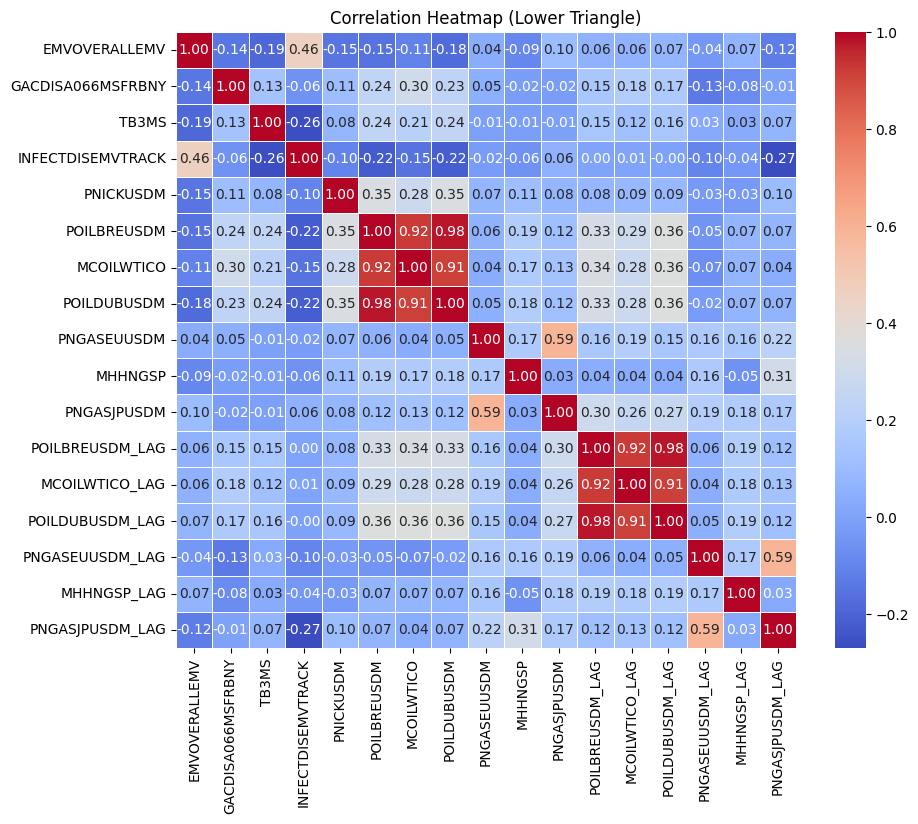

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()